In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 
from scipy import stats
# use seaborn plotting defaults
import seaborn as sns; 
sns.set()

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0])

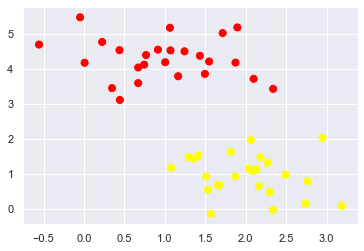

In [4]:
from sklearn.datasets.samples_generator import make_blobs # library to make random data blo
# define the data that clearly seperated
X, y = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60) # plot the data using scatter chart
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');
y

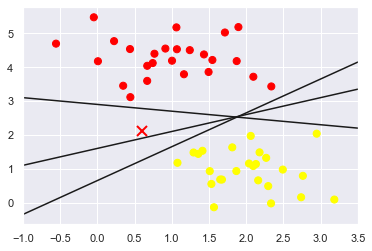

In [12]:
# draw a best-fit line
xfit = np.linspace(-1, 3.5)
# plot the data using scatter chart
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# mark the possible line point
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)
# try three different data on the best-fit line
for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]: # plot y = mx + b
    plt.plot(xfit, m * xfit + b, '-k')
# display within this x limits
plt.xlim(-1, 3.5);

array([-1.        , -0.90816327, -0.81632653, -0.7244898 , -0.63265306,
       -0.54081633, -0.44897959, -0.35714286, -0.26530612, -0.17346939,
       -0.08163265,  0.01020408,  0.10204082,  0.19387755,  0.28571429,
        0.37755102,  0.46938776,  0.56122449,  0.65306122,  0.74489796,
        0.83673469,  0.92857143,  1.02040816,  1.1122449 ,  1.20408163,
        1.29591837,  1.3877551 ,  1.47959184,  1.57142857,  1.66326531,
        1.75510204,  1.84693878,  1.93877551,  2.03061224,  2.12244898,
        2.21428571,  2.30612245,  2.39795918,  2.48979592,  2.58163265,
        2.67346939,  2.76530612,  2.85714286,  2.94897959,  3.04081633,
        3.13265306,  3.2244898 ,  3.31632653,  3.40816327,  3.5       ])

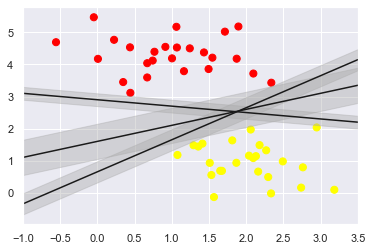

In [5]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# use three data points on the best-fit line with some margin
for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]: 
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
# fill the margin with color
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none', color='#AAAAAA', alpha=0.4)
# display within this x limits
plt.xlim(-1, 3.5);

In [5]:
from sklearn.svm import SVC
# "Support vector classifier" 
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [6]:
"""
Plot the decision function for a 2D SVC
"""
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim() 
    ylim = ax.get_ylim()
        # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
        # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5,
    linestyles=['--', '-', '--'])
        # plot support vectors
    if plot_support: 
        ax.scatter(model.support_vectors_[:, 0],model.support_vectors_[:, 1],
            s=300, linewidth=1, facecolors='none'); 
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

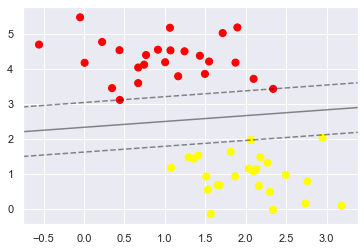

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
plot_svc_decision_function(model)

In [8]:
 model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

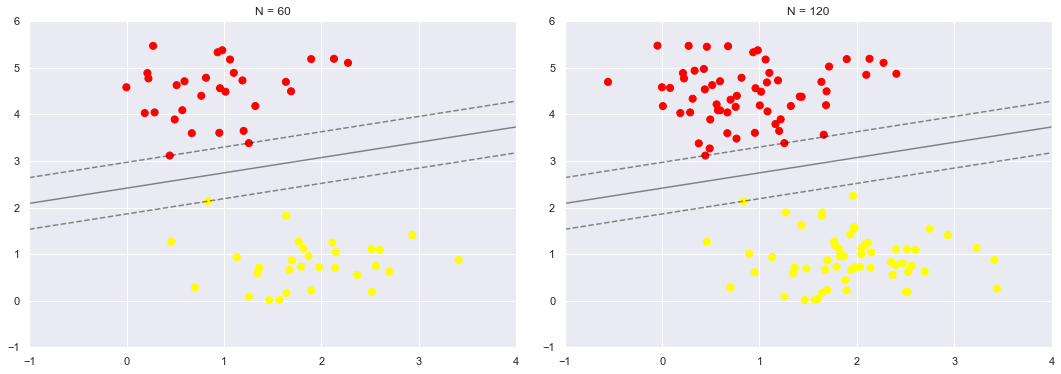

In [9]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,random_state=0, cluster_std=0.60) 
    X=X[:N]
    y=y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)
fig, ax = plt.subplots(1, 2, figsize=(16, 6)) 
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1) 
for axi,N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

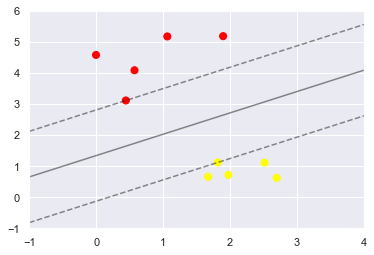

In [10]:
# library to make an interactive python notebook widget
from ipywidgets import interact,fixed
# plot the interactive chart
interact(plot_svm, N=[10, 30, 50, 70, 100, 120, 150, 200], ax=fixed(None));

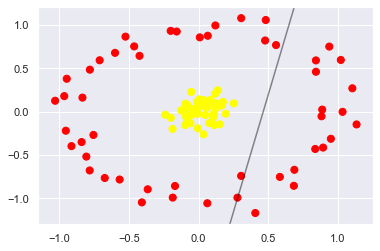

In [12]:
# library to generate circle data
from sklearn.datasets.samples_generator import make_circles # generate the data
X, y = make_circles(100, factor=.1, noise=.1) 
clf = SVC(kernel='linear').fit(X, y)
# plot the chart
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
# try to make the best-fit line
plot_svc_decision_function(clf, plot_support=False);

In [13]:
r = np.exp(-(X ** 2).sum(1))

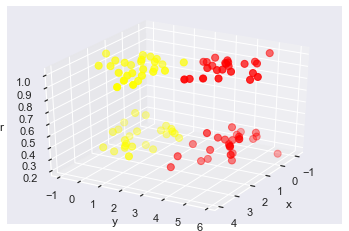

In [44]:
from mpl_toolkits import mplot3d
def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn') 
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')
interact(plot_3D, elev=[90, 70, 50, 30, 10, -10, -30, -50, -70, -90], azip=(-180, 180), X=fixed(X), y=fixed(y));
plt.show()

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


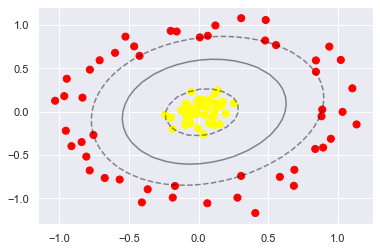

In [18]:
# change the kernel from "linear" to "rbf"
clf = SVC(kernel='rbf', C=1E6) 
clf.fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf) 
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],s=300, lw=1, facecolors='none');

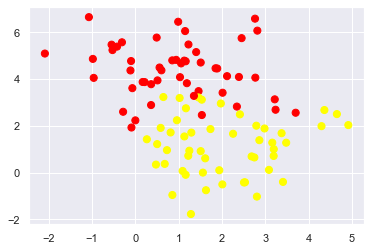

In [19]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

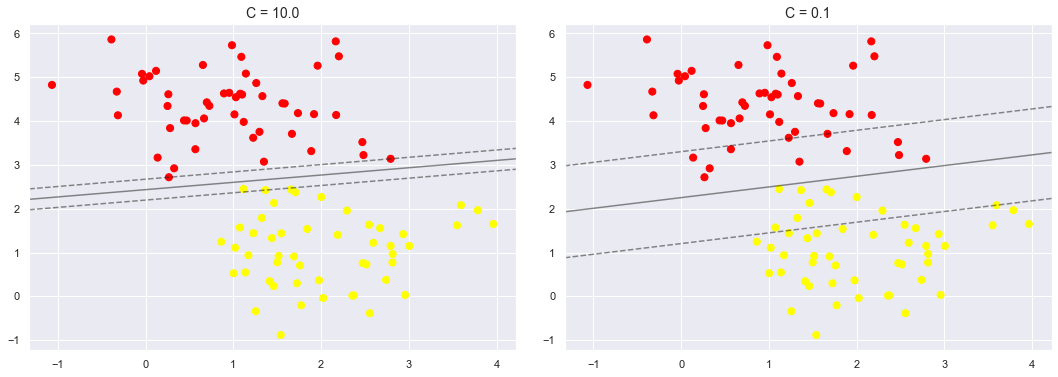

In [23]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.8) 
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
# test two different 'c' values (10 and 0.1) and plot the results
for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y) 
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn') 
    plot_svc_decision_function(model, axi) 
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none'); 
    axi.set_title('C = {0:.1f}'.format(C), size=14)

In [1]:
from sklearn.datasets import fetch_lfw_people 
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


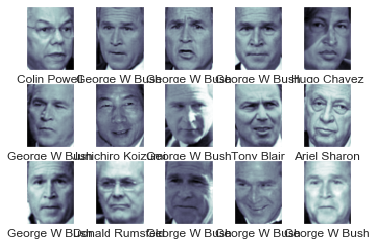

In [26]:
fig, ax = plt.subplots(3, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone') 
    axi.set(xticks=[], yticks=[],
    xlabel=faces.target_names[faces.target[i]])

In [27]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
pca = PCA(n_components=150, whiten=True, random_state=42) 
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [29]:
 from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(faces.data, faces.target, random_state=42)

In [30]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'svc__C': [1, 5, 10, 50],'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]} 
grid = GridSearchCV(model, param_grid)
%time grid.fit(Xtrain, ytrain) 
print(grid.best_params_)

/Users/mac/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


CPU times: user 52 s, sys: 1.18 s, total: 53.2 s
Wall time: 13.7 s
{'svc__C': 10, 'svc__gamma': 0.001}


In [34]:
model = grid.best_estimator_ 
yfit = model.predict(Xtest)

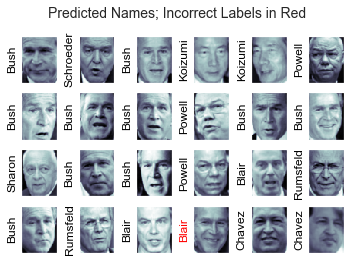

In [35]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.flat):
    axi.imshow(Xtest[i].reshape(62, 47), cmap='bone') 
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[yfit[i]].split()[-1],
        color='black' if yfit[i] == ytest[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [36]:
# import classification report metrices
from sklearn.metrics import classification_report 
print(classification_report(ytest, yfit, target_names=faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



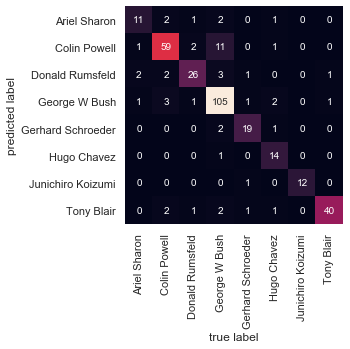

In [37]:
# import the confusion matrix
from sklearn.metrics import confusion_matrix
# compute the confusion matrix
cm = confusion_matrix(ytest, yfit)
# plot the confusion matrix
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,xticklabels=faces.target_names, yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');